# SOM Self Organized Maps
### From scratch

In [ ]:
from utilities.std_imports import *

## 1. Distances

e = $ \large \sqrt{(v1 - v2)^2}$  
  
m = $ \large |r1 - r2| + | c1 - c2 | $

In [ ]:
def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

## 2. Find closest node

In [ ]:
def closest_node(data, t, map, m_rows, m_cols):
  # (row,col) of map node closest to data[t]
  result = (0,0)
  small_dist = 1.0e20
  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t])
      if ed < small_dist:
        small_dist = ed
        result = (i, j)
  return result

## 3. Most common node (winner)

In [ ]:
def most_common(lst, n):
  # lst is a list of values 0 . . n
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)

## Testing

### Load data

In [16]:
np.random.seed(1)
Dim = 4
Rows = 30; Cols = 30
RangeMax = Rows + Cols
LearnMax = 0.5
StepsMax = 5000

print("\nLoading Iris data into memory \n")
data_file = 'D:/Data/text/iris_data_012.txt'
data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4), dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", usecols=[4], dtype=np.int)


Loading Iris data into memory 



### Build the SOM

In [17]:
print("Constructing a 30x30 SOM from the iris data")
map = np.random.random_sample(size=(Rows,Cols,Dim))
for s in range(StepsMax):
    if s % (StepsMax/10) == 0: print("step = ", str(s)) 
    pct_left = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = (int)(pct_left * RangeMax) 
    curr_rate = pct_left * LearnMax

t = np.random.randint(len(data_x))
(bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
for i in range(Rows):
    for j in range(Cols):
        if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
            map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
print("SOM construction complete \n")

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete 



### Construct U-Matrix

U-Matrix constructed 



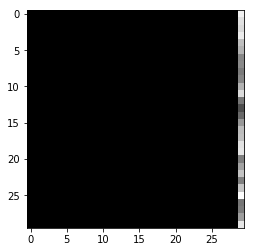

In [19]:
u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
for i in range(Rows):
    for j in range(Cols):
      v = map[i][j]  # a vector 
      sum_dists = 0.0; ct = 0
     
      if i-1 >= 0:    # above
        sum_dists += euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:   # below
        sum_dists += euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:   # left
        sum_dists += euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:   # right
        sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
    u_matrix[i][j] = sum_dists / ct
print("U-Matrix constructed \n")

plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
plt.show()

### Associate data label with a map node

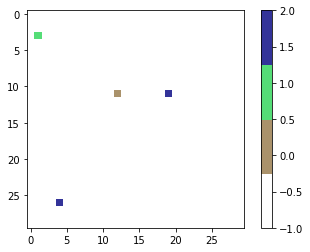

In [21]:
mapping = np.empty(shape=(Rows,Cols), dtype=object)
for i in range(Rows):
    for j in range(Cols):
        mapping[i][j] = []

for t in range(len(data_x)):
    (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
    mapping[m_row][m_col].append(data_y[t])

label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
for i in range(Rows):
    for j in range(Cols):
      label_map[i][j] = most_common(mapping[i][j], 3)
 
plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
plt.colorbar()
plt.show()